In [1]:
# Problem Statement 14

# Dataset: Link to the Dataset:

# https://www.kaggle.com/datasets/vishweshsalodkar/customer-feedback-dataset to an external site.

# Description of Data: This dataset contains customer sentiments and dataset  text, sentiment (positive or negative), source of the sentiment, date/time of the sentiment,
# user ID, location, and confidence score. The sentiments reflect customers' opinions and experiences with products, services, movies, music, books, restaurants, websites,
# customer support, and more.

##### Below 3 steps are optional and should be executed if you haven;t downloaded the zip file from the below link and should be executed on google colab along with user's kaggle.json file
#### https://www.kaggle.com/datasets/vishweshsalodkar/customer-feedback-dataset

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d vishweshsalodkar/customer-feedback-dataset

  0%|                                               | 0.00/3.52k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 3.52k/3.52k [00:00<00:00, 2.42MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/customer-feedback-dataset.zip' , 'r')
zip_ref.extractall()
zip_ref.close()

FileNotFoundError: [Errno 2] No such file or directory: '/content/customer-feedback-dataset.zip'

**Task 1: Import pandas and read in the csv file in the link. Separate only 'text' column for the below tasks


In [4]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.tokenize import sent_tokenize,word_tokenize
nltk.download('punkt')

# Download the NLTK stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from collections import defaultdict

from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud
import spacy
from sklearn.decomposition import LatentDirichletAllocation



[nltk_data] Downloading package punkt to /Users/syntax/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/syntax/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /Users/syntax/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/syntax/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


ModuleNotFoundError: No module named 'wordcloud'

In [6]:
# Replace 'your_file_path' with the actual path to your CSV file
# file_path = 'https://www.kaggle.com/datasets/vishweshsalodkar/customer-feedback-dataset'
# Read the CSV file and select the 'text' column
# df = pd.read_csv(file_path, index_col = False, sep=", ")


df = pd.read_csv('/content/sentiment-analysis.csv', delimiter=', ')
df

<ipython-input-6-856204e548b3>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('/content/sentiment-analysis.csv', delimiter=', ')


,"""Text",Sentiment,Source,Date/Time,User ID,Location,"Confidence Score"""
0,"""""""I love this product!""""",Positive,Twitter,2023-06-15 09:23:14,@user123,New York,"0.85"""
1,"""""""The service was terrible.""""",Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,"0.65"""
2,"""""""This movie is amazing!""""",Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,"0.92"""
3,"""""""I'm so disappointed with their customer sup...",Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,"0.78"""
4,"""""""Just had the best meal of my life!""""",Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,"0.88"""
...,...,...,...,...,...,...,...
93,"""""""I can't stop listening to this song. It's m...",Positive,Spotify,2023-07-03 09:17:52,musiclover789,Berlin,"0.91"""
94,"""""""Their website is so confusing and poorly de...",Negative,Website Review,2023-07-03 11:59:18,user789,Toronto,"0.68"""
95,"""""""I had an incredible experience at the theme...",Positive,Trip Report,2023-07-03 14:40:05,thrillseeker1,Orlando,"0.89"""
96,"""""",None,None,None,None,None,None


In [7]:
# removing last two rows from the dataset as data is blank or None
df = df[:-2]
df.tail(3)

,"""Text",Sentiment,Source,Date/Time,User ID,Location,"Confidence Score"""
93,"""""""I can't stop listening to this song. It's m...",Positive,Spotify,2023-07-03 09:17:52,musiclover789,Berlin,"0.91"""
94,"""""""Their website is so confusing and poorly de...",Negative,Website Review,2023-07-03 11:59:18,user789,Toronto,"0.68"""
95,"""""""I had an incredible experience at the theme...",Positive,Trip Report,2023-07-03 14:40:05,thrillseeker1,Orlando,"0.89"""


<span style="color: blue;">As it can be seen from the dataset, that Text contains sum junk data like starting and ending quotes which needs to be removed. Hence, preprocessing is required. In which, we will remove special characters, quotes before proceeding.</span>

In [8]:
df_text = df['"Text']

In [9]:
# remove first 3 quotes character and last 2 quotes characters
def remove_quotes(msg):
  return msg[3:-2]

text_message = df_text.apply(remove_quotes)
# lets store this in separate column as original text
df['original_text'] = text_message


<ipython-input-9-48e51765860d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['original_text'] = text_message


In [10]:
# Remove stopwords
stop_words = set(stopwords.words("english"))

text_message = text_message.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
text_message

0                                       I love product!
1                                 The service terrible.
2                                   This movie amazing!
3                    I'm disappointed customer support.
4                                  Just best meal life!
                            ...                        
91         Just amazing vacation! I can't wait go back.
92    The food restaurant awful. Never going back ag...
93      I can't stop listening song. It's new favorite!
94             Their website confusing poorly designed.
95     I incredible experience theme park. So much fun!
Name: "Text, Length: 96, dtype: object

In [11]:
wordnet_lemmatizer = WordNetLemmatizer()
porter_stemmer = PorterStemmer()

def cleanup_session(message):
  #message = re.sub(r"[^\w\s]", "", message) # Remove punctuation
  message = message.lower() # Convert to lowercase
  message = wordnet_lemmatizer.lemmatize(message)
  message = porter_stemmer.stem(message)

  return message

# Added clean text into new column in the dataset
df["text"] = text_message
df["text"] = df["text"].apply(cleanup_session)



<ipython-input-11-2bf6ea5d0ba1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"] = text_message
<ipython-input-11-2bf6ea5d0ba1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"] = df["text"].apply(cleanup_session)


**Task 2: Use TF-IDF Vectorization to create a vectorized document term matrix. Justify the max_df and min_df parameters you used .

<span style="color: blue;">Before creating tf-idf vectors let do some preprocessing on the text.  As it was seen the text starts with quotes but doesn't end with it. So, clearly preprocessing is required and we did it in above cells<br/>
**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"<br/>
**min_df** is used for removing terms that appear too infrequently<br/>
We tried with multiple value like max_df=0.85, but 0.7 gave us the best result
</span>

In [12]:
# Create a TF-IDF vectorizer with specified max_df and min_df parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.7, min_df=0.01)

tfidf_matrix = tfidf_vectorizer.fit_transform(df["text"])


**Task 3: Build and display a dependency parser tree for the sentence at index 5 in the Data **

<span style="color: blue;">Note: we are building parse tree on preprocessed text and the original text as well of the given indexed sentence. </span>

In [13]:
# Task 3: Build and display a dependency parser tree
nlp = spacy.load("en_core_web_sm")

In [14]:
# Parse the sentence at index 5
sentence_index = 5
#sentence = df_text.iloc[sentence_index]
original_sentence = df['original_text'].iloc[sentence_index]
sentence = df["text"].iloc[sentence_index]
doc = nlp(sentence)
print('Sentence after preprocessing steps has been applied : ', doc)

# Display the dependency parser tree
from spacy import displacy
displacy.render(doc, style="dep", jupyter=True)

print('--'*50)

print('Original sentence without any significant preprocessing: ', original_sentence)
displacy.render(nlp(original_sentence), style="dep", jupyter=True)


Sentence after preprocessing steps has been applied :  the quality product subpar.


----------------------------------------------------------------------------------------------------
Original sentence without any significant preprocessing:  The quality of this product is subpar.


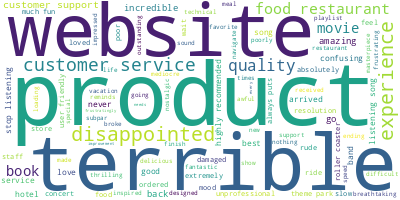

In [15]:
# visualization of important words in the corpus

long_string = ' ,'.join(list(df["text"].values))

word_cloud = WordCloud(background_color = "white", max_words = 1000, contour_width = 3, contour_color='red')
word_cloud.generate(long_string)

word_cloud.to_image()

**Task 4: Using Scikit-Learn create an instance of LDA with 20 expected components. (Use random_state=42) (2 Marks)**

<span style="color: blue;">n_components is nothing but the number of topics which will be assigned to the documents.</span>

In [16]:

# Create an instance of LDA with 20 expected components and set random_state
lda_model = LatentDirichletAllocation(n_components=20, random_state=42)
p1 = lda_model.fit(tfidf_matrix)


**Task 5: Print our the top 15 most common words for each of the 20 topics

In [17]:
# Get the feature names from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()
# print(feature_names)
# Print the top 15 words for each topic
for topic_idx, topic in enumerate(lda_model.components_):
    #print(topic_idx, topic)
    top_words_idx = topic.argsort()[-15:][::-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")




Topic 1: listening, stop, song, can, it, new, favorite, incredible, stay, finest, luxury, absolutely, hotel, amazing, the
Topic 2: feel, made, inspired, this, recommended, highly, book, album, work, art, electrifying, energy, contagious, live, every
Topic 3: book, unacceptable, received, this, bored, tears, finish, worst, delayed, flight, beautifully, provoking, thought, written, rude
Topic 4: quality, subpar, the, product, website, needs, frustratingly, speed, improvement, loading, slow, purchased, week, within, sleek
Topic 5: recommend, avoid, costs, great, chat, helpful, truly, care, customers, highly, friendly, outstanding, customer, they, store
Topic 6: extremely, quality, disappointed, product, no, resolution, customer, support, the, it, website, to, this, experience, movie
Topic 7: service, terrible, customer, the, unprofessional, hotel, staff, rude, support, experience, addicted, game, plot, hard, follow
Topic 8: designed, poorly, confusing, their, website, exceptional, beyond,

**Task 6: Add a new column to the original dataframe that labels each question into one of the 20 topic categories. 

<span style="color: blue;">Adding new column <b>topic_label</b> in the dataframe.</span>

In [21]:
# Task 6: Add a new column to the original dataframe for topic labels
topic_labels = lda_model.fit_transform(tfidf_matrix)
score = lda_model.score(tfidf_matrix)
print('--'*50)

df['topic_label'] = topic_labels.argmax(axis=1)
df

----------------------------------------------------------------------------------------------------


<ipython-input-21-7f7e216950cd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['topic_label'] = topic_labels.argmax(axis=1)


,"""Text",Sentiment,Source,Date/Time,User ID,Location,"Confidence Score""",original_text,text,topic_label
0,"""""""I love this product!""""",Positive,Twitter,2023-06-15 09:23:14,@user123,New York,"0.85""",I love this product!,i love product!,9
1,"""""""The service was terrible.""""",Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,"0.65""",The service was terrible.,the service terrible.,6
2,"""""""This movie is amazing!""""",Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,"0.92""",This movie is amazing!,this movie amazing!,14
3,"""""""I'm so disappointed with their customer sup...",Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,"0.78""",I'm so disappointed with their customer support.,i'm disappointed customer support.,10
4,"""""""Just had the best meal of my life!""""",Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,"0.88""",Just had the best meal of my life!,just best meal life!,13
...,...,...,...,...,...,...,...,...,...,...
91,"""""""Just had the most amazing vacation! I can't...",Positive,TripAdvisor,2023-07-02 18:01:23,travelenthusiast1,Sydney,"0.93""",Just had the most amazing vacation! I can't wa...,just amazing vacation! i can't wait go back.,13
92,"""""""The food at this restaurant was awful. Neve...",Negative,Zomato,2023-07-02 20:45:37,foodlover123,Mumbai,"0.55""",The food at this restaurant was awful. Never g...,the food restaurant awful. never going back ag...,14
93,"""""""I can't stop listening to this song. It's m...",Positive,Spotify,2023-07-03 09:17:52,musiclover789,Berlin,"0.91""",I can't stop listening to this song. It's my n...,i can't stop listening song. it's new favorite!,0
94,"""""""Their website is so confusing and poorly de...",Negative,Website Review,2023-07-03 11:59:18,user789,Toronto,"0.68""",Their website is so confusing and poorly desig...,their website confusing poorly designed.,7


In [19]:
# Save the modified dataframe to a new CSV file if needed
# df.to_csv('customer_feedback_with_topics.csv', index=False)

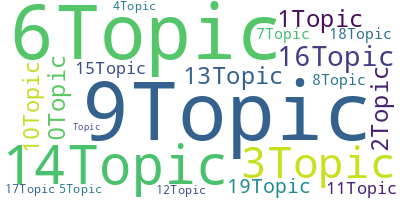

In [20]:
topics = ''
for a in df['topic_label']:
  topics = topics + 'Topic '+str(a);

word_cloud = WordCloud(background_color = "white", max_words = 1000, contour_width = 5, contour_color='red')
word_cloud.generate(topics)

word_cloud.to_image()

**Task 7: Imagine you've trained an LDA model on a diverse collection of documents that encompass a wide range of topics. During your analysis, you come across a topic that seems to have certain words closely related to a specific domain. However, when you investigate the documents assigned to this topic, you find that they span multiple domains and not just the one you initially thought of. Explain a potential reason for this discrepancy and suggest an approach to address or mitigate such situations.

<span style="color: blue;">This can happen when a word have more that one meaning in different context. Word Ambiguity is the reason behind the assignment of multiple domains to the topic.<br/>
To mitigate this problem we can use word sense diasambiguition techniques to understand the meaning of word in right context.
Another is to do a through analysis on the assigned documents to get the valuable insights into the underlying relationships between the words and domains.</span>